# Infinite Edge dislocation:

This is a simple model for an edge dislocation, derived within Segall's Earthquake and Volcano Deformation book.  The coordinate system is defined as:

![image.png](img/EdgeDislocation_cs.png)

In this case, the surface displacements are defined as:

![image.png](img/EdgeDislocation_equations.png)

Where:

![image.png](img/EdgeDislocation_eta.png)

$\xi_{1}$ is the horizontal location of the upper tip of the dislocation.  This can be cast in terms of the depth and dip of the dislocation as:

$\xi_{i} = \frac{d}{\tan(\delta)}$

Define $s$, $x_{1}$, and $d$, and $\delta$:

In [291]:
import numpy as np

se = -1 # Negative is reverse motion.
x1 = np.arange(-5,5,0.1)
d = 1
delta = 89.99 #degrees

Calcualte $u_{1}$ and $u_{2}$:

In [292]:
deltarad = np.deg2rad(delta)
zeta = (x1 / d) - (1 / np.tan(deltarad))
u1 = (se/np.pi)*(np.cos(deltarad)*np.arctan(zeta) + (np.sin(deltarad) - zeta*np.cos(deltarad))/(1+np.power(zeta,2)))
u2 = (-se/np.pi)*(np.sin(deltarad)*np.arctan(zeta) + (np.cos(deltarad) + zeta*np.sin(deltarad))/(1+np.power(zeta,2)))

Plot $u_{1}$, $u_{2}$:

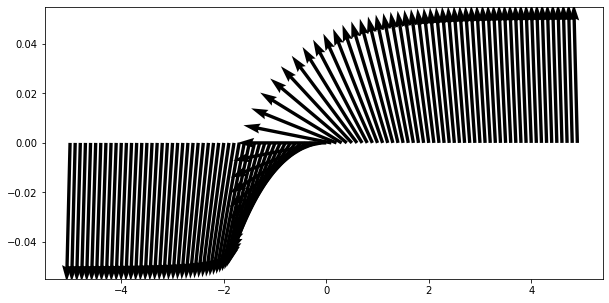

In [293]:
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = [10, 5]

plt.quiver(x1,np.zeros_like(x1),u1,u2,scale=2)


# Infinite Screw Dislocation

This is a simple model for a screw dislocation from Sandwell's geodynamics notes (https://topex.ucsd.edu/geodynamics/13fault_disp.pdf):

![image.png](img/ScrewDislocation_equation.png)

Here, $V$ is the slip along the screw dislocation, $x$ is equavallent to $x_{1}$ is the location of a point relative to the upper tip of the dislocation (equivallent to $x_{1} - \xi_{1}$ above), $D$ is the same as $d$, and $\alpha$ is the angle between a vertical screw dislocation and the dipping case ($\alpha = \pi/2 - \delta$).

Standardizing the nomenclature to Segall, and subsituting the definition of $\zeta$ above yields:

$u_{3} = \frac{s_{s}}{\pi}\left(\tan^{-1}\left(\frac{\zeta \cos^{2}(\alpha)}{1 - \zeta \sin(\alpha)\cos(\alpha)}\right) - \alpha\right)$

Where $s_{s}$ is the slip assigned to the screw dislocation.  Casting in terms of $\delta$:

$u_{3} = \frac{s_{s}}{\pi}\left(\tan^{-1}\left(\frac{\zeta \sin^{2}(\delta)}{1 - \zeta \sin(\delta)\cos(\delta)}\right) + \delta - \frac{\pi}{2} \right)$

Note: while I did not re-derive Sandwell's $\alpha$ adjustment, simple tests indicate that the sign of the $\pi/2$ adjustment must be opposite that of $\delta$.  This is implemented below.

Finally, $s_{s}$ adheres to a positive left-lateral strike-slip faulting convention.

In [294]:
ss = 1

u3 = (ss/np.pi)*(np.arctan2(zeta*np.power(np.sin(deltarad),2) , (1 - zeta*np.sin(deltarad)*np.cos(deltarad))) + (deltarad - np.sign(deltarad)*np.pi/2.0))

Plot $u_{3}$:

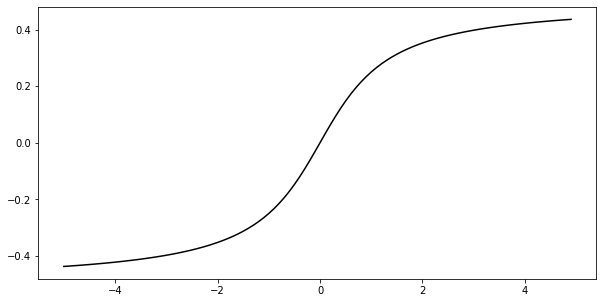

In [295]:
plt.plot(x1,u3,'k-')

# Superpose dislocation solutions to generalize to oblique-slip dipping fault with coordinate transformation

Define $(x, y)$ offset of the surface projection of the top of the dislocation relative to coordinate system as $(x_{0}, y_{0}$).

Define fault dip as $\delta$, and fault strike as $\theta$.



In [338]:
se = -1.0 # Negative is reverse motion.
ss = -1.0 # Negative is right-lateral strike-slip motion
x1 = np.arange(-5,5,0.1)
x2 = np.arange(-5,5,0.1)
d = 0.01
delta = 30.0 #degrees
theta = 90.0 #degrees
x0 = 2.0
y0 = 1.0

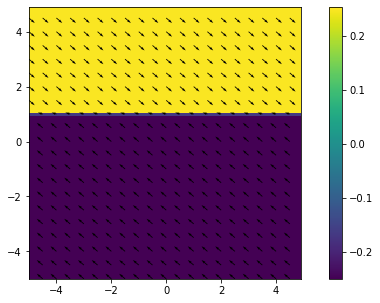

In [339]:
(X1,X2) = np.meshgrid(x1-x0,x2-y0)
deltarad = np.deg2rad(delta)
thetarad = np.deg2rad(theta)
X1p = X1*np.cos(np.pi-thetarad) + X2*np.sin(np.pi-thetarad)
Zeta = (X1p / d) - (1 / np.tan(deltarad))
U1 = (se/np.pi)*(np.cos(deltarad)*np.arctan(Zeta) + (np.sin(deltarad) - Zeta*np.cos(deltarad))/(1+np.power(Zeta,2)))
U2 = (-se/np.pi)*(np.sin(deltarad)*np.arctan(Zeta) + (np.cos(deltarad) + Zeta*np.sin(deltarad))/(1+np.power(Zeta,2)))
U3 = (ss/np.pi)*(np.arctan2(Zeta*np.power(np.sin(deltarad),2) , (1 - Zeta*np.sin(deltarad)*np.cos(deltarad))) + (deltarad - np.sign(deltarad)*np.pi/2.0))

U1p = U1*np.cos(thetarad-np.pi) + U3*np.sin(thetarad-np.pi)
U2p = -U1*np.sin(thetarad-np.pi) + U3*np.cos(thetarad-np.pi)
plt.imshow(U2, extent=[min(x1), max(x1), min(x2), max(x2)], origin='lower')
plt.colorbar()
plt.quiver(x1[0::5], x2[0::5], U1p[0::5,0::5], U2p[0::5,0::5])
